In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re 
import pandas
from collections import defaultdict
#from smile_generator import *
from rdkit import Chem
from copy import deepcopy
from kidanemariam_ezr import *

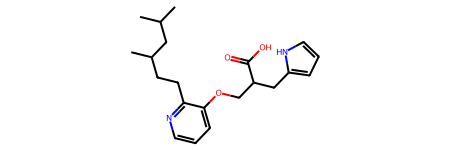

In [3]:
mol_object=Molecule.from_smiles("CC(CC(C)C)CCc1ncccc1OCC(C(O)=O)Cc1[nH]ccc1")
mol_object

In [4]:
classified_m=Molecule.classify_BM_atom(mol_object)
classified_m

{<CH1>: 'ring',
 <CH1>: 'ring',
 <C>: 'ring',
 <O>: 'linkers',
 <CH2>: 'linkers',
 <N>: 'ring',
 <CH1>: 'linkers',
 <C>: 'side chain',
 <CH2>: 'side chain',
 <CH1>: 'ring',
 <OH1>: 'side chain',
 <O>: 'side chain',
 <CH2>: 'linkers',
 <C>: 'ring',
 <NH1>: 'ring',
 <C>: 'ring',
 <CH1>: 'ring',
 <CH1>: 'ring',
 <CH3>: 'side chain',
 <CH1>: 'ring',
 <CH3>: 'side chain',
 <CH2>: 'side chain',
 <CH2>: 'side chain',
 <CH1>: 'side chain',
 <CH3>: 'side chain',
 <CH1>: 'side chain'}

This code loads a molecule from a file, classifies the atoms in the molecule using the classify_BM_atoms function, and then uses the RDKit visualization capabilities to highlight the atoms according to their Bemis-Murcko type. A dictionary is used to map each atom type to a specific color, and the SetProp method is used to set a color property for each atom. Finally, the molecule is drawn to a file with the highlighted atoms.

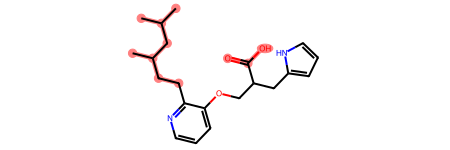

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw

# Load molecule from file
#mol = Chem.MolFromMolFile('molecule.mol')
mol_object.to_rdkit()
# Classify atoms in the molecule
classification = Molecule.classify_BM_atom(mol_object)
mol,mapping=mol_object.to_rdkit_with_map()
#--------------------
rdkit_ring_atoms=[mapping[ra] for ra in mol_object.get_atoms() if mol_object._classification[ra]=="side chain"]

rdkit_ring_atoms
mol.__sssAtoms=rdkit_ring_atoms
mol

Task 3

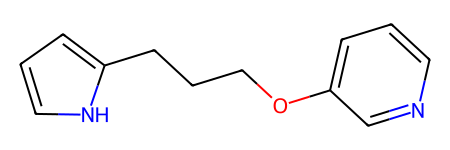

In [6]:
BM_scaffold=Molecule.get_BM_scaffolds(mol_object)
BM_scaffold

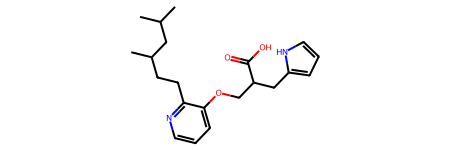

In [7]:
mol_object

task 4

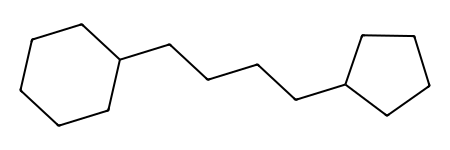

In [8]:
cyclic_skeleton=Molecule.get_cyclic_skeletons(mol_object)
cyclic_skeleton

task 5

This function makes a copy of the cyclic skeleton and iterates over the atoms and bonds in the skeleton, setting the atom degrees to 2 and the bond orders to 1. It then sets the formal charges to 0 and updates the hydrogen counts to ensure that the formal charges remain unchanged. This results in a reduced ring scaffold where all atoms have degree 2 and all bonds have bond order 1, and the lengths of the linkers and the sizes of the rings are minimized

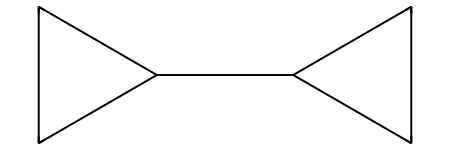

In [9]:
reduced_ring_scaffold=Molecule.get_reduced_ring_scaffolds(mol_object)
reduced_ring_scaffold

In [10]:
Molecule.to_smiles(reduced_ring_scaffold)

'C1CC1C1CC1'

### Apply your methods to the molecules in the files 5ht1a.smi, d4.smi, and net.smi. For each of the files, determine the number of different molecules, Bemis-Murcko scaffolds, cyclic skeletons, and reduced ring scaffolds

In [11]:
def file_df(smi):
    with open(smi, "r") as file:
        data = file.readlines()


    smiles = []

    # Iterate through each line and append the first to the list
    for smile in data:
        smiles_ = smile.split(" ")[0]
        smiles.append(smiles_)

    # Create a dataframe from the list of first lines, with index column
    df = pd.DataFrame(smiles, columns=["smiles"], index=range(1, len(smiles)+1))
    return df

    





In [12]:
d4_smiles=file_df('d4.smi')
h5t1a_smiles=file_df('5ht1a.smi')
net_smiles=file_df('net.smi')

In [13]:
d4_smiles

smiles
1      CN1CCN2c3c1cccc3C4C2CCN(C4)CCCC(=O)c5ccc(cc5)F
2                          CCN(CC)C(=S)SSC(=S)N(CC)CC
3                       c1ccc(cc1)OCCCNCCOc2ccc(cc2)O
4                              c1cc2c(cc1Cl)CNC(=N2)N
5            c1ccc(cc1)C(c2ccccc2)(c3ccccc3Cl)n4ccnc4
..                                                ...
79  c1ccc(cc1)N2CNC(=O)C23CCN(CC3)CCCC(=O)c4ccc(cc4)F
80         c1cc(ccc1N2CCN(CC2)CCNCC3CCc4ccc(cc4O3)O)I
81                      Cc1ccc(cc1Cl)OCCNCCCOc2ccccc2
82            Cc1ccc(cc1C)C(=NOC)CCN2CCN(CC2)c3ccccn3
83  COc1ccccc1N2CCN(CC2)CCCCn3cc(nn3)c4ccc(cc4)c5c...

[83 rows x 1 columns]

In [14]:
def process_dataframe(df, column, function,desired_col):
    # Apply the function to the specified column
    result = df[column].apply(function)
    # Create a new column in the dataframe with the result
    df[desired_col] = result
    return df

## 6.1

In [15]:
with_unique_structure=process_dataframe(d4_smiles,'smiles',Molecule.from_smiles,'M-structure')
#with_unique_structure

## 6.2

In [16]:
with_BM_scaffold=process_dataframe(with_unique_structure,'M-structure',Molecule.get_BM_scaffolds,'BM-scaffold')
#with_BM_scaffold

## 6.3

In [17]:
with_cyclic_skeleton=process_dataframe(with_BM_scaffold,'BM-scaffold',Molecule.get_cyclic_skeletons,'cyclic_skeleton')
#with_cyclic_skeleton

## 6.4

In [18]:
with_reduced_ring_scaffold=process_dataframe(with_cyclic_skeleton,'cyclic_skeleton',Molecule.get_reduced_ring_scaffolds,'reduced_ring_scaffold')
with_reduced_ring_scaffold

smiles  \
1      CN1CCN2c3c1cccc3C4C2CCN(C4)CCCC(=O)c5ccc(cc5)F   
2                          CCN(CC)C(=S)SSC(=S)N(CC)CC   
3                       c1ccc(cc1)OCCCNCCOc2ccc(cc2)O   
4                              c1cc2c(cc1Cl)CNC(=N2)N   
5            c1ccc(cc1)C(c2ccccc2)(c3ccccc3Cl)n4ccnc4   
..                                                ...   
79  c1ccc(cc1)N2CNC(=O)C23CCN(CC3)CCCC(=O)c4ccc(cc4)F   
80         c1cc(ccc1N2CCN(CC2)CCNCC3CCc4ccc(cc4O3)O)I   
81                      Cc1ccc(cc1Cl)OCCNCCCOc2ccccc2   
82            Cc1ccc(cc1C)C(=NOC)CCN2CCN(CC2)c3ccccn3   
83  COc1ccccc1N2CCN(CC2)CCCCn3cc(nn3)c4ccc(cc4)c5c...   

                                          M-structure  \
1   <kidanemariam_ezr.Molecule object at 0x000002B...   
2   <kidanemariam_ezr.Molecule object at 0x000002B...   
3   <kidanemariam_ezr.Molecule object at 0x000002B...   
4   <kidanemariam_ezr.Molecule object at 0x000002B...   
5   <kidanemariam_ezr.Molecule object at 0x000002B...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x000002B...   
80  <kidanemariam_ezr.Molecule object at 0x000002B...   
81  <kidanemariam_ezr.Molecule object at 0x000002B...   
82  <kidanemariam_ezr.Molecule object at 0x000002B...   
83  <kidanemariam_ezr.Molecule object at 0x000002B...   

                                          BM-scaffold  \
1   <kidanemariam_ezr.Molecule object at 0x000002B...   
2   <kidanemariam_ezr.Molecule object at 0x000002B...   
3   <kidanemariam_ezr.Molecule object at 0x000002B...   
4   <kidanemariam_ezr.Molecule object at 0x000002B...   
5   <kidanemariam_ezr.Molecule object at 0x000002B...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x000002B...   
80  <kidanemariam_ezr.Molecule object at 0x000002B...   
81  <kidanemariam_ezr.Molecule object at 0x000002B...   
82  <kidanemariam_ezr.Molecule object at 0x000002B...   
83  <kidanemariam_ezr.Molecule object at 0x000002B...   

                                      cyclic_skeleton  \
1   <kidanemariam_ezr.Molecule object at 0x000002B...   
2   <kidanemariam_ezr.Molecule object at 0x000002B...   
3   <kidanemariam_ezr.Molecule object at 0x000002B...   
4   <kidanemariam_ezr.Molecule object at 0x000002B...   
5   <kidanemariam_ezr.Molecule object at 0x000002B...   
..                                                ...   
79  <kidanemariam_ezr.Molecule object at 0x000002B...   
80  <kidanemariam_ezr.Molecule object at 0x000002B...   
81  <kidanemariam_ezr.Molecule object at 0x000002B...   
82  <kidanemariam_ezr.Molecule object at 0x000002B...   
83  <kidanemariam_ezr.Molecule object at 0x000002B...   

                                reduced_ring_scaffold  
1   <kidanemariam_ezr.Molecule object at 0x000002B...  
2   <kidanemariam_ezr.Molecule object at 0x000002B...  
3   <kidanemariam_ezr.Molecule object at 0x000002B...  
4   <kidanemariam_ezr.Molecule object at 0x000002B...  
5   <kidanemariam_ezr.Molecule object at 0x000002B...  
..                                                ...  
79  <kidanemariam_ezr.Molecule object at 0x000002B...  
80  <kidanemariam_ezr.Molecule object at 0x000002B...  
81  <kidanemariam_ezr.Molecule object at 0x000002B...  
82  <kidanemariam_ezr.Molecule object at 0x000002B...  
83  <kidanemariam_ezr.Molecule object at 0x000002B...  

[83 rows x 5 columns]